In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the 'gas production' csv file into a pandas DataFrame
gas_prod = pd.read_csv('../data/clean_data/Gas Production - EJ-YearFixed-Python.csv') #, index_col=0
gas_prod.head()

,Year,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,Bolivia,Brazil,Brunei,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
0,1970,0.09,0.21,0.06,NaN,0.02,NaN,NaN,NaN,0.01,...,NaN,NaN,0.03,0.39,20.57,6.75,NaN,0.31,NaN,NaN
1,1971,0.09,0.23,0.09,NaN,0.03,NaN,NaN,NaN,0.01,...,NaN,NaN,0.05,0.66,21.16,7.24,NaN,0.30,NaN,NaN
2,1972,0.12,0.22,0.13,NaN,0.04,0.02,0.04,0.01,0.02,...,NaN,NaN,0.05,0.95,21.09,7.55,NaN,0.30,NaN,NaN
3,1973,0.16,0.24,0.17,NaN,0.06,0.02,0.06,0.01,0.07,...,NaN,NaN,0.06,1.03,21.07,8.06,NaN,0.37,NaN,NaN
4,1974,0.18,0.25,0.19,NaN,0.07,0.02,0.06,0.01,0.15,...,NaN,NaN,0.06,1.24,20.14,8.89,NaN,0.39,NaN,NaN


In [3]:
# Replace all the blanks (or NaN) with zero
clean_gas_prod = gas_prod.replace(np.nan,0)
clean_gas_prod.tail()

,Year,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,Bolivia,Brazil,Brunei,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
45,2015,2.93,1.28,2.74,0.68,0.53,0.93,0.70,0.86,0.48,...,2.37,0.68,2.11,1.46,26.65,0.0,1.93,1.30,0.37,0.10
46,2016,3.29,1.34,3.47,0.66,0.52,0.95,0.68,0.87,0.47,...,2.28,0.68,2.17,1.50,26.18,0.0,1.91,1.34,0.37,0.02
47,2017,3.35,1.34,4.06,0.64,0.52,0.96,0.66,0.98,0.46,...,2.11,0.70,2.24,1.51,26.86,0.0,1.92,1.39,0.34,0.02
48,2018,3.38,1.42,4.68,0.69,0.53,0.96,0.61,0.91,0.45,...,2.21,0.71,2.21,1.46,30.09,0.0,2.06,1.14,0.35,0.02
49,2019,3.10,1.50,5.52,0.88,0.61,1.03,0.54,0.93,0.47,...,2.27,0.71,2.25,1.43,33.15,0.0,2.03,0.95,0.35,0.02


In [4]:
# Read the 'world population' csv file into pandas; adding in 'Population' feature
global_pop = pd.read_csv('../data/clean_data/WorldPopulationbyYear.csv')
global_pop.tail()

,Year,World
55,2015,7338964960
56,2016,7424282488
57,2017,7509065705
58,2018,7591932907
59,2019,7673533972


In [5]:
# Merge the 'gas production' with 'world population by year'
gas_pop = global_pop.merge(clean_gas_prod, on="Year")
gas_pop.head()

,Year,World,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,Bolivia,Brazil,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
0,1970,3682911039,0.09,0.21,0.06,0.0,0.02,0.00,0.00,0.00,...,0.0,0.0,0.03,0.39,20.57,6.75,0.0,0.31,0.0,0.0
1,1971,3760509002,0.09,0.23,0.09,0.0,0.03,0.00,0.00,0.00,...,0.0,0.0,0.05,0.66,21.16,7.24,0.0,0.30,0.0,0.0
2,1972,3836892580,0.12,0.22,0.13,0.0,0.04,0.02,0.04,0.01,...,0.0,0.0,0.05,0.95,21.09,7.55,0.0,0.30,0.0,0.0
3,1973,3912347640,0.16,0.24,0.17,0.0,0.06,0.02,0.06,0.01,...,0.0,0.0,0.06,1.03,21.07,8.06,0.0,0.37,0.0,0.0
4,1974,3988478324,0.18,0.25,0.19,0.0,0.07,0.02,0.06,0.01,...,0.0,0.0,0.06,1.24,20.14,8.89,0.0,0.39,0.0,0.0


In [6]:
# Renaming columns 
# new_df = df.rename(columns={"A": "a", "B": "c"})
gas_pop = gas_pop.rename(columns={"World": "Total Population", "Total World": "Total Exajoules"})
gas_pop.tail()

,Year,Total Population,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,Bolivia,Brazil,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
45,2015,7338964960,2.93,1.28,2.74,0.68,0.53,0.93,0.70,0.86,...,2.37,0.68,2.11,1.46,26.65,0.0,1.93,1.30,0.37,0.10
46,2016,7424282488,3.29,1.34,3.47,0.66,0.52,0.95,0.68,0.87,...,2.28,0.68,2.17,1.50,26.18,0.0,1.91,1.34,0.37,0.02
47,2017,7509065705,3.35,1.34,4.06,0.64,0.52,0.96,0.66,0.98,...,2.11,0.70,2.24,1.51,26.86,0.0,1.92,1.39,0.34,0.02
48,2018,7591932907,3.38,1.42,4.68,0.69,0.53,0.96,0.61,0.91,...,2.21,0.71,2.21,1.46,30.09,0.0,2.06,1.14,0.35,0.02
49,2019,7673533972,3.10,1.50,5.52,0.88,0.61,1.03,0.54,0.93,...,2.27,0.71,2.25,1.43,33.15,0.0,2.03,0.95,0.35,0.02


In [7]:
# Adding in 'GDP' as a feature
# Read the 'GDP' csv file into pandas
gdp_percent = pd.read_csv('../data/clean_data/GDP%-YearFixed-Python.csv', encoding = 'ISO-8859-1')
gdp_percent.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,19.454687,25.819058,50.781142,NaN,NaN,34.202489,NaN,29.725798,17.070705,...,26.064980,NaN,NaN,27.676728,NaN,21.126805,24.297531,NaN,42.791494,10.035640
51,2016,17.808790,25.223825,50.778208,NaN,NaN,27.214708,NaN,29.609790,17.663228,...,26.370120,NaN,NaN,26.578058,NaN,21.056630,23.913640,NaN,38.206219,9.861371
52,2017,19.174225,25.094501,48.048795,NaN,NaN,24.130305,NaN,28.096348,18.757232,...,29.473116,NaN,NaN,26.582114,NaN,22.800229,24.222791,NaN,41.003028,9.702188
53,2018,18.958521,NaN,47.110681,NaN,NaN,17.869421,NaN,26.093365,20.965838,...,37.642509,NaN,NaN,26.533055,NaN,24.192831,24.382773,NaN,38.390521,9.347354
54,2019,17.754955,NaN,44.334419,NaN,NaN,NaN,NaN,NaN,18.166368,...,39.803700,NaN,NaN,26.843839,NaN,NaN,NaN,NaN,39.231946,NaN


In [8]:
# Replace all the blanks (or NaN) with zero
clean_gdp_percent = gdp_percent.replace(np.nan,0)
clean_gdp_percent.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,19.454687,25.819058,50.781142,0.0,0.0,34.202489,0.0,29.725798,17.070705,...,26.064980,0.0,0.0,27.676728,0.0,21.126805,24.297531,0.0,42.791494,10.035640
51,2016,17.808790,25.223825,50.778208,0.0,0.0,27.214708,0.0,29.609790,17.663228,...,26.370120,0.0,0.0,26.578058,0.0,21.056630,23.913640,0.0,38.206219,9.861371
52,2017,19.174225,25.094501,48.048795,0.0,0.0,24.130305,0.0,28.096348,18.757232,...,29.473116,0.0,0.0,26.582114,0.0,22.800229,24.222791,0.0,41.003028,9.702188
53,2018,18.958521,0.000000,47.110681,0.0,0.0,17.869421,0.0,26.093365,20.965838,...,37.642509,0.0,0.0,26.533055,0.0,24.192831,24.382773,0.0,38.390521,9.347354
54,2019,17.754955,0.000000,44.334419,0.0,0.0,0.000000,0.0,0.000000,18.166368,...,39.803700,0.0,0.0,26.843839,0.0,0.000000,0.000000,0.0,39.231946,0.000000


In [9]:
filtered_gdp = clean_gdp_percent[['Year', 'United States', 'World']]
filtered_gdp = filtered_gdp.rename(columns={'United States': 'US GDP (%)', 'World': 'World GDP (%)'})
filtered_gdp.tail()

,Year,US GDP (%),World GDP (%)
50,2015,21.099052,24.297531
51,2016,20.387569,23.913640
52,2017,20.658987,24.222791
53,2018,21.021222,24.382773
54,2019,0.000000,0.000000


In [10]:
# Merge the latest dataframe with 'filtered GDP'
gas_prod_v1 = filtered_gdp.merge(gas_pop, on="Year")
gas_prod_v1.head()

,Year,US GDP (%),World GDP (%),Total Population,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
0,1970,21.414736,26.911121,3682911039,0.09,0.21,0.06,0.0,0.02,0.00,...,0.0,0.0,0.03,0.39,20.57,6.75,0.0,0.31,0.0,0.0
1,1971,21.919818,26.526697,3760509002,0.09,0.23,0.09,0.0,0.03,0.00,...,0.0,0.0,0.05,0.66,21.16,7.24,0.0,0.30,0.0,0.0
2,1972,22.580622,26.164536,3836892580,0.12,0.22,0.13,0.0,0.04,0.02,...,0.0,0.0,0.05,0.95,21.09,7.55,0.0,0.30,0.0,0.0
3,1973,23.331809,27.054172,3912347640,0.16,0.24,0.17,0.0,0.06,0.02,...,0.0,0.0,0.06,1.03,21.07,8.06,0.0,0.37,0.0,0.0
4,1974,22.694942,27.896165,3988478324,0.18,0.25,0.19,0.0,0.07,0.02,...,0.0,0.0,0.06,1.24,20.14,8.89,0.0,0.39,0.0,0.0


In [11]:
# Adding in 'Inflation' as a feature
# Read the 'Inflation' csv file into pandas
inflation = pd.read_csv('../data/clean_data/InflationAnnual%-YearFixed-Python.csv', encoding = 'ISO-8859-1')
inflation.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,-0.661709,1.896174,4.784447,NaN,NaN,-21.531694,0.968993,1.814077,NaN,...,NaN,2.483269,121.738085,0.631201,NaN,1.431611,1.393330,NaN,10.110593,-2.409500
51,2016,4.383892,1.275432,6.397695,NaN,NaN,32.377734,-0.489438,2.068840,NaN,...,NaN,0.842069,254.948535,2.668248,NaN,-0.219107,1.486007,NaN,17.869730,-1.566413
52,2017,4.975952,1.986661,5.591116,NaN,NaN,31.691686,2.432488,1.966826,NaN,...,NaN,3.084526,NaN,3.520257,NaN,0.212571,2.233522,NaN,6.577312,0.909733
53,2018,0.626149,2.028060,4.269990,NaN,NaN,20.190374,1.207158,2.458142,34.277224,...,NaN,2.330964,NaN,3.539628,NaN,-0.195108,2.458142,NaN,7.494572,NaN
54,2019,2.302373,1.411091,1.951768,NaN,NaN,17.145320,NaN,1.336016,53.548304,...,NaN,2.762520,NaN,2.795824,NaN,1.580183,2.318441,NaN,9.150316,NaN


In [12]:
# Replace all the blanks (or NaN) with zero
clean_inf = inflation.replace(np.nan,0)
clean_inf.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,-0.661709,1.896174,4.784447,0.0,0.0,-21.531694,0.968993,1.814077,0.000000,...,0.0,2.483269,121.738085,0.631201,0.0,1.431611,1.393330,0.0,10.110593,-2.409500
51,2016,4.383892,1.275432,6.397695,0.0,0.0,32.377734,-0.489438,2.068840,0.000000,...,0.0,0.842069,254.948535,2.668248,0.0,-0.219107,1.486007,0.0,17.869730,-1.566413
52,2017,4.975952,1.986661,5.591116,0.0,0.0,31.691686,2.432488,1.966826,0.000000,...,0.0,3.084526,0.000000,3.520257,0.0,0.212571,2.233522,0.0,6.577312,0.909733
53,2018,0.626149,2.028060,4.269990,0.0,0.0,20.190374,1.207158,2.458142,34.277224,...,0.0,2.330964,0.000000,3.539628,0.0,-0.195108,2.458142,0.0,7.494572,0.000000
54,2019,2.302373,1.411091,1.951768,0.0,0.0,17.145320,0.000000,1.336016,53.548304,...,0.0,2.762520,0.000000,2.795824,0.0,1.580183,2.318441,0.0,9.150316,0.000000


In [13]:
filtered_inf = clean_inf[['Year', 'United States', 'World']]
filtered_inf = filtered_inf.rename(columns={'United States': 'US Inflation (Annual %)', 'World': 'World Inflation (Annual %)'})
filtered_inf.head()

,Year,US Inflation (Annual %),World Inflation (Annual %)
0,1965,1.585169,0.0
1,1966,3.015075,0.0
2,1967,2.772786,0.0
3,1968,4.271796,0.0
4,1969,5.462386,0.0


In [14]:
# Merge the latest dataframe with 'filtered inflation'
gas_prod_v2 = filtered_inf.merge(gas_prod_v1, on="Year")
gas_prod_v2.head()

,Year,US Inflation (Annual %),World Inflation (Annual %),US GDP (%),World GDP (%),Total Population,Algeria,Argentina,Australia,Azerbaijan,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
0,1970,5.838255,0.0,21.414736,26.911121,3682911039,0.09,0.21,0.06,0.0,...,0.0,0.0,0.03,0.39,20.57,6.75,0.0,0.31,0.0,0.0
1,1971,4.292767,0.0,21.919818,26.526697,3760509002,0.09,0.23,0.09,0.0,...,0.0,0.0,0.05,0.66,21.16,7.24,0.0,0.30,0.0,0.0
2,1972,3.272278,0.0,22.580622,26.164536,3836892580,0.12,0.22,0.13,0.0,...,0.0,0.0,0.05,0.95,21.09,7.55,0.0,0.30,0.0,0.0
3,1973,6.177760,0.0,23.331809,27.054172,3912347640,0.16,0.24,0.17,0.0,...,0.0,0.0,0.06,1.03,21.07,8.06,0.0,0.37,0.0,0.0
4,1974,11.054805,0.0,22.694942,27.896165,3988478324,0.18,0.25,0.19,0.0,...,0.0,0.0,0.06,1.24,20.14,8.89,0.0,0.39,0.0,0.0


In [15]:
# Adding in 'Taxes on goods & services' as a feature
# Read the 'Taxes' csv file into pandas
taxes = pd.read_csv('../data/clean_data/Taxes%-YearFixed-Python.csv', encoding = 'ISO-8859-1')
taxes.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,2.654241,54.627694,NaN,NaN,NaN,6.740552,NaN,NaN,28.000035,...,35.128015,37.645983,NaN,NaN,NaN,NaN,33.724915,NaN,32.436842,46.878657
51,2016,7.055293,55.926813,NaN,NaN,NaN,8.063090,NaN,NaN,27.241612,...,32.963595,36.204418,NaN,NaN,NaN,NaN,34.248831,NaN,27.856806,46.781836
52,2017,8.598224,53.294789,NaN,NaN,NaN,7.445482,NaN,NaN,30.252266,...,38.608093,37.694728,NaN,NaN,NaN,NaN,33.333664,NaN,36.894517,47.064242
53,2018,NaN,53.132719,NaN,NaN,NaN,NaN,NaN,NaN,33.348220,...,44.812047,35.406407,NaN,NaN,NaN,NaN,34.011405,NaN,38.004259,41.234977
54,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Replace all the blanks (or NaN) with zero
clean_tax = taxes.replace(np.nan,0)
clean_tax.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,2.654241,54.627694,0.0,0.0,0.0,6.740552,0.0,0.0,28.000035,...,35.128015,37.645983,0.0,0.0,0.0,0.0,33.724915,0.0,32.436842,46.878657
51,2016,7.055293,55.926813,0.0,0.0,0.0,8.063090,0.0,0.0,27.241612,...,32.963595,36.204418,0.0,0.0,0.0,0.0,34.248831,0.0,27.856806,46.781836
52,2017,8.598224,53.294789,0.0,0.0,0.0,7.445482,0.0,0.0,30.252266,...,38.608093,37.694728,0.0,0.0,0.0,0.0,33.333664,0.0,36.894517,47.064242
53,2018,0.000000,53.132719,0.0,0.0,0.0,0.000000,0.0,0.0,33.348220,...,44.812047,35.406407,0.0,0.0,0.0,0.0,34.011405,0.0,38.004259,41.234977
54,2019,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [17]:
filtered_tax = clean_tax[['Year', 'United States', 'World']]
filtered_tax = filtered_tax.rename(columns={'United States': 'US Tax (% on Goods & Services)', 'World': 'World Tax (% on Goods & Services)'})
filtered_tax.head()

,Year,US Tax (% on Goods & Services),World Tax (% on Goods & Services)
0,1965,0.0,0.0
1,1966,0.0,0.0
2,1967,0.0,0.0
3,1968,0.0,0.0
4,1969,0.0,0.0


In [18]:
# Merge the latest dataframe with 'filtered taxes'
final_gas_prod = filtered_tax.merge(gas_prod_v2, on="Year")
final_gas_prod.head()

,Year,US Tax (% on Goods & Services),World Tax (% on Goods & Services),US Inflation (Annual %),World Inflation (Annual %),US GDP (%),World GDP (%),Total Population,Algeria,Argentina,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
0,1970,0.000000,0.0,5.838255,0.0,21.414736,26.911121,3682911039,0.09,0.21,...,0.0,0.0,0.03,0.39,20.57,6.75,0.0,0.31,0.0,0.0
1,1971,0.000000,0.0,4.292767,0.0,21.919818,26.526697,3760509002,0.09,0.23,...,0.0,0.0,0.05,0.66,21.16,7.24,0.0,0.30,0.0,0.0
2,1972,7.143859,0.0,3.272278,0.0,22.580622,26.164536,3836892580,0.12,0.22,...,0.0,0.0,0.05,0.95,21.09,7.55,0.0,0.30,0.0,0.0
3,1973,6.579487,0.0,6.177760,0.0,23.331809,27.054172,3912347640,0.16,0.24,...,0.0,0.0,0.06,1.03,21.07,8.06,0.0,0.37,0.0,0.0
4,1974,5.990202,0.0,11.054805,0.0,22.694942,27.896165,3988478324,0.18,0.25,...,0.0,0.0,0.06,1.24,20.14,8.89,0.0,0.39,0.0,0.0


In [19]:
# -------------------------------------COME BACK TO RESHAPE W ADDED FEATURES-----------------------------------------------

In [20]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

# Using decades 1980-2000 to help us setup for future predictions (therefore, I use [10:30])

X_prod = final_gas_prod["Total Population"][10:30].values.reshape(-1, 1) 
y_prod = final_gas_prod["Total Exajoules"][10:30].values.reshape(-1, 1)

print("Shape: ", X_prod.shape, y_prod.shape)

Shape:  (20, 1) (20, 1)


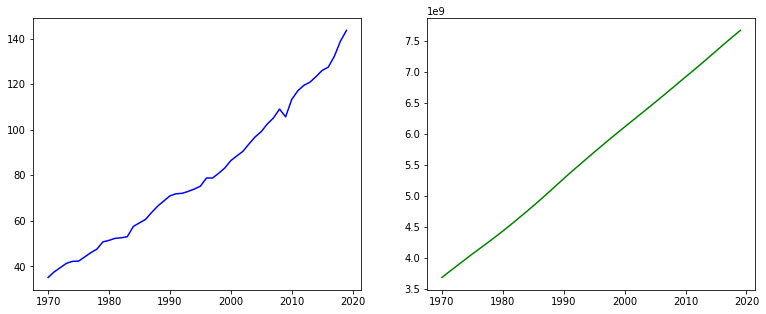

In [21]:
x_prod = final_gas_prod['Year']
y1_prod = final_gas_prod['Total Exajoules']
y2_prod = final_gas_prod['Total Population']

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(x_prod, y1_prod, color='b')
plt.subplot(132)
plt.plot(x_prod, y2_prod, color='g')
plt.show()

# Come back to add labels and customize ------------------------------------------------------------------------------------

In [22]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION
X_train_prod, X_test_prod, y_train_prod, y_test_prod = train_test_split(X_prod, y_prod, random_state=5)
### END SOLUTION

In [23]:
# Create the model

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model_prod = LinearRegression()
### END SOLUTION

In [24]:
world_gas_2000_prod = final_gas_prod['Total Population'][30].reshape(-1, 1) 
world_gas_2000_prod.shape

(1, 1)

In [25]:
exajoules_2000_prod = final_gas_prod['Total Exajoules'][30].reshape(-1, 1)
exajoules_2000_prod.shape

(1, 1)

In [26]:
# Fit the model to the data 
from sklearn.metrics import mean_squared_error, r2_score
fitment_prod = model_prod.fit(X_prod, y_prod)

predicted_prod = fitment_prod.predict(world_gas_2000_prod)

print(f"Prediction Production: {predicted_prod}")
print(f"Actual Production: {exajoules_2000_prod}")

### BEGIN SOLUTION
# model.fit(X_train, y_train)
### END SOLUTION

Prediction Production: [[84.99416557]]
Actual Production: [[86.44]]


In [27]:
final_gas_prod.loc[final_gas_prod['Year'].between(1980, 2000), ['Total Population', 'Total Exajoules']]

,Total Population,Total Exajoules
10,4432925590,51.42
11,4511137170,52.31
12,4592341169,52.55
13,4674266079,53.02
14,4755914211,57.55
15,4839074592,59.10
16,4924736807,60.63
17,5012555212,63.67
18,5101297281,66.48
19,5189996799,68.71


In [28]:
# A 'for loop' to make predictions for 2000-2019 (historical)
# Move window one year ahead each time

predict00_19_prod = []
actual00_19_prod = []
    
for year in range(20):
    start = 1980 + year
    end = 2000 + year
    
#     print(start)
#     print(end)

    xy_prod = final_gas_prod.loc[final_gas_prod['Year'].between(start, end), ['Total Population', 'Total Exajoules']]
    X_prod = xy_prod["Total Population"].values.reshape(-1, 1)
    y_prod = xy_prod["Total Exajoules"].values.reshape(-1, 1)
    fitment_prod = model_prod.fit(X_prod, y_prod)
    gas_prod_predict = fitment_prod.predict(xy_prod['Total Population'].iloc[20].reshape(-1, 1))
    print(gas_prod_predict)
    predict00_19_prod.append(gas_prod_predict)
    

#     print(xy_prod['Total Population'].iloc[20])
#     exajoules_loop_prod = fitment_prod.predict(xy_prod['Total Exajoules'].to_numpy().reshape(-1, 1))

[[85.24550571]]
[[87.19134888]]
[[89.12309375]]
[[91.17659918]]
[[93.3097081]]
[[95.73773751]]
[[98.39987042]]
[[101.13309347]]
[[104.30256566]]
[[106.56047921]]
[[109.85143312]]
[[113.41229469]]
[[116.92740717]]
[[120.10349638]]
[[123.15638441]]
[[126.1103487]]
[[128.73933862]]
[[131.84973101]]
[[135.3843992]]
[[139.13469527]]


In [29]:
predict00_19_prod # This list is printing from 2000-2019

[array([[85.24550571]]),
 array([[87.19134888]]),
 array([[89.12309375]]),
 array([[91.17659918]]),
 array([[93.3097081]]),
 array([[95.73773751]]),
 array([[98.39987042]]),
 array([[101.13309347]]),
 array([[104.30256566]]),
 array([[106.56047921]]),
 array([[109.85143312]]),
 array([[113.41229469]]),
 array([[116.92740717]]),
 array([[120.10349638]]),
 array([[123.15638441]]),
 array([[126.1103487]]),
 array([[128.73933862]]),
 array([[131.84973101]]),
 array([[135.3843992]]),
 array([[139.13469527]])]

In [30]:
y_prod

array([[ 83.16],
       [ 86.44],
       [ 88.51],
       [ 90.54],
       [ 93.79],
       [ 96.86],
       [ 99.16],
       [102.53],
       [105.16],
       [109.06],
       [105.66],
       [113.26],
       [117.07],
       [119.48],
       [120.88],
       [123.33],
       [126.02],
       [127.45],
       [132.21],
       [138.87],
       [143.62]])

In [31]:
# actual00_19_prod

In [32]:
# Adding historical predictions to view comparison w/ actual values
